In [158]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, k_means
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [159]:
df = pd.read_csv('/Users/sammarcustaylor/Desktop/StudentsPerformance.csv')

df.rename(columns = {'race/ethnicity' : 'race_ethnicity', 'parental level of education' : 'parent_education', 
                     'test preperation course' : 'test_prep', 'math score': 'math_score', 
                     'reading score' : 'reading_score', 'writing score' : 'writing_score'}, inplace = True)

In [160]:
for column in df:
    unique_vals = np.unique(df[column])
    num_values = len(unique_vals)
    if num_values < 10:
         print("The number of values for feature {} : {} --> {}".format(column, num_values, unique_vals))
    else:
        print("The number of values for feature {} : {}".format(column, num_values, unique_vals))

The number of values for feature gender : 2 --> ['female' 'male']
The number of values for feature race_ethnicity : 5 --> ['group A' 'group B' 'group C' 'group D' 'group E']
The number of values for feature parent_education : 6 --> ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
The number of values for feature lunch : 2 --> ['free/reduced' 'standard']
The number of values for feature test preparation course : 2 --> ['completed' 'none']
The number of values for feature math_score : 81
The number of values for feature reading_score : 72
The number of values for feature writing_score : 77


In [161]:
df

,gender,race_ethnicity,parent_education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [162]:
# replace scores with letter labels. 

df['math_'] = pd.cut(df.math_score, bins = [0, 59, 69, 79, 89, 99], labels = ['F','D', 'C', 'B', 'A'])
df['reading_'] = pd.cut(df.reading_score, bins = [0, 59, 69, 79, 89, 99], labels = ['F','D', 'C', 'B', 'A'])
df['writing_'] = pd.cut(df.writing_score, bins = [0, 59, 69, 79, 89, 99], labels = ['F','D', 'C', 'B', 'A'])

df.drop(['math_score', 'reading_score', 'writing_score'], axis = 1, inplace = True)

In [163]:
# make categorical variables into numeric representations 
# 8 columns to 32 columns. 

new_df = pd.get_dummies(df)

print(df.shape)
print(new_df.shape)

(1000, 8)
(1000, 32)


In [165]:
X_train = new_df.values

# start with 3 clusters
kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print('The clusters are :', kmeans.labels_)


# Prints the inertia
print('The intertia is: ', kmeans.inertia_)


# for each record we have each is classified into a cluster. Every student corresponds to one cluster. 

# Intertia is a metric that shows how internally coherent the clusters are. 

The clusters are : [3 1 3 2 3 3 1 2 0 2 2 2 3 1 2 3 3 2 2 2 0 1 2 3 1 3 2 3 0 3 3 0 0 2 3 1 3
 2 1 2 2 3 2 0 2 2 0 3 1 1 2 0 2 3 1 2 1 2 2 2 1 2 0 3 2 0 2 3 2 2 1 0 2 2
 2 2 2 1 1 0 2 2 2 0 2 3 3 3 3 3 3 2 3 2 3 1 0 1 0 0 0 1 3 2 1 3 3 0 3 3 1
 2 2 2 1 3 3 3 0 0 1 1 1 2 3 3 0 1 3 2 3 2 1 1 1 2 2 2 0 0 3 0 2 2 3 2 3 0
 1 1 0 0 1 2 0 1 1 0 1 0 1 1 2 2 3 1 2 1 1 1 1 3 3 3 2 1 2 1 1 1 1 0 2 3 2
 0 0 0 2 3 0 1 0 0 1 2 0 2 2 3 1 3 0 0 2 1 0 1 3 0 1 2 0 2 1 1 1 2 3 2 1 3
 0 3 1 2 3 2 0 1 0 2 3 3 1 3 0 1 2 3 0 3 2 2 0 3 3 1 0 0 2 3 1 3 2 3 0 1 3
 1 1 1 2 3 0 2 3 3 1 3 0 2 2 3 1 3 1 1 3 2 2 2 3 1 2 1 1 3 3 1 0 3 0 3 1 0
 2 1 2 3 1 2 1 0 1 0 1 2 0 2 3 0 0 0 1 0 1 3 0 0 1 3 3 2 2 3 0 2 1 2 0 2 2
 3 3 0 1 2 2 2 2 3 1 1 0 3 0 1 0 3 0 2 1 2 3 3 0 0 0 3 2 1 2 2 2 2 2 0 2 3
 3 1 3 1 3 2 3 1 3 0 3 1 3 2 2 3 3 0 0 3 1 3 0 2 1 2 0 3 0 2 1 2 2 1 2 3 0
 3 2 1 1 1 0 0 1 0 1 0 0 2 1 1 2 1 2 0 3 0 2 0 0 3 2 2 0 2 0 0 2 1 1 3 0 3
 3 1 0 1 2 3 1 3 3 2 0 2 3 2 3 0 2 2 3 3 1 3 2 0 1 3 1 3 1 0 1 1 0 3 3 0 1
 2 0 2

In [166]:
# Intertia goes down with more clusters. This is because the more individual clusters the less spread out individual
# points will be from any given cluster. 



no_of_clusters = range(2, 19)
intertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters = f, random_state = 2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    intertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 4657.217146505691
The inertia for : 3 Clusters is: 4268.497470387483
The inertia for : 4 Clusters is: 4040.5076394513267
The inertia for : 5 Clusters is: 3852.745652080276
The inertia for : 6 Clusters is: 3683.396660384237
The inertia for : 7 Clusters is: 3570.4916397323
The inertia for : 8 Clusters is: 3450.460936730512
The inertia for : 9 Clusters is: 3399.239506779841
The inertia for : 10 Clusters is: 3306.0255581258657
The inertia for : 11 Clusters is: 3203.046179743315
The inertia for : 12 Clusters is: 3145.9696475887736
The inertia for : 13 Clusters is: 3084.4883694755304
The inertia for : 14 Clusters is: 3036.1130209211387
The inertia for : 15 Clusters is: 2979.7065350451394
The inertia for : 16 Clusters is: 2927.9659360831256
The inertia for : 17 Clusters is: 2884.7122806505463
The inertia for : 18 Clusters is: 2846.2774820603627


Text(0.5, 1.0, 'Intertia Plot per K')

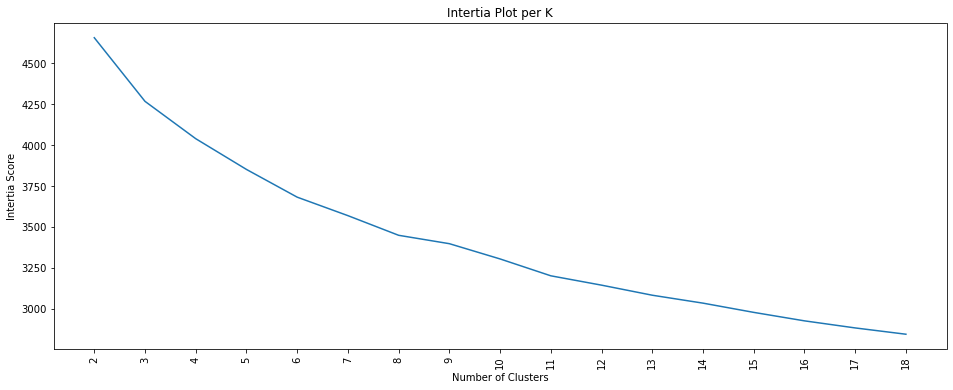

In [167]:
# elbow method

fig, (ax1) = plt.subplots(1, figsize = (16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, intertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation = 'vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia Score')
plt.title('Intertia Plot per K')


In [170]:
kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# predictions for new data
predictions = kmeans.predict(X_train)

# calculating the counts of each cluster class
unique, counts = np.unique(predictions, return_counts = True)
counts = counts.reshape(1, 4)

# creating a dataframe
count_cl_df = pd.DataFrame(counts, columns = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

count_cl_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,216,258,268,258


# Running with PCA to visualize and improve results

+ Compressing the columns and only keeping the ones with the most important information. 

+ The first principal component is required to have the largest possible variance (intertia) therefore this component will explain the largest part of the interia/ variance of the data table; hence the less principal components you have the lower the interia will be after PCA. 

+ As we add new principal components then the intertia will increase with each. Therefore intertia is not the approprate criterum to choose the amount of principal components, rather we should choose the number based on 95% explained variance. 

+ By running PCA on the dichotomous data it creates new scores. Therefore data is no longer binary

In [171]:
new_df.shape

(1000, 32)

Explained variance ration (first two components): [0.12230049 0.07857463]


<Figure size 432x288 with 0 Axes>

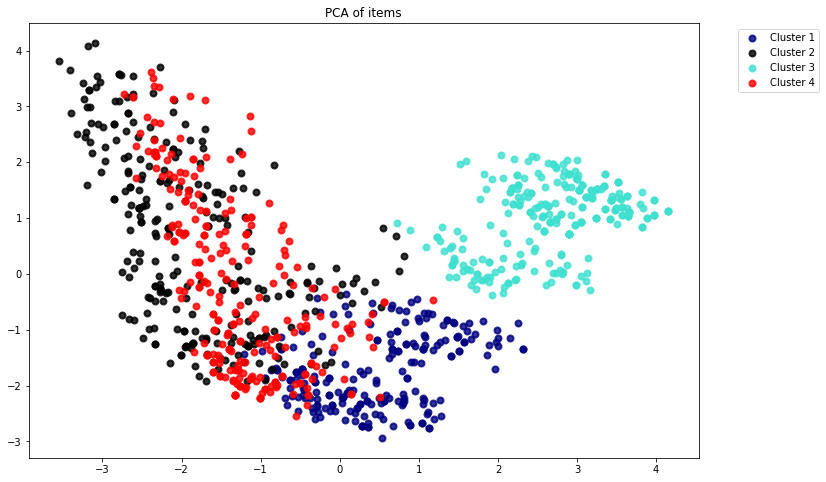

In [173]:
# given the fact that this dataset is all zeros and ones scaling is useless. 

X = X_train
y_num = predictions

target_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# going from 32 columns to 2 Principal Components. 
pca = PCA(n_components=2, random_state = 1)
X_r = pca.fit(X_scaled).transform(X_scaled)


print('Explained variance ration (first two components): %s' % str(pca.explained_variance_ratio_))

# plotting the data
plt.figure()
plt.figure(figsize = (12, 8))
colors = ['navy', 'black', 'turquoise', 'red']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color = color, alpha = .8, lw = lw, label = target_name)
    
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad =0.6)
plt.title('PCA of items')
plt.show()

# This is two principal components explaining 19 percent of the variance in our dataset. 

+ Why dimensionality reduction in could help K-means perform better?

+ K-means is extremely sensitive to scale, and when you have a lof of aattributes there is no true scale anymore. 
PCA comes in and whitens the data. 

+ By applying PCA clusters are pushed away because we only want to keep the variance. Unavoidably we minimize the in cluster variance because they are pushed away from eachother. 

# Identify the best number of components

Total variance in our dataset is:  5.271640640640639
The 95% variance we want to have is:  5.008058608608606

Variance explain with 10 n_components 3.7772618843560744
Variance explain with 15 n_components 4.6251284142279125
Variance explain with 19 n_components 5.047261494917391


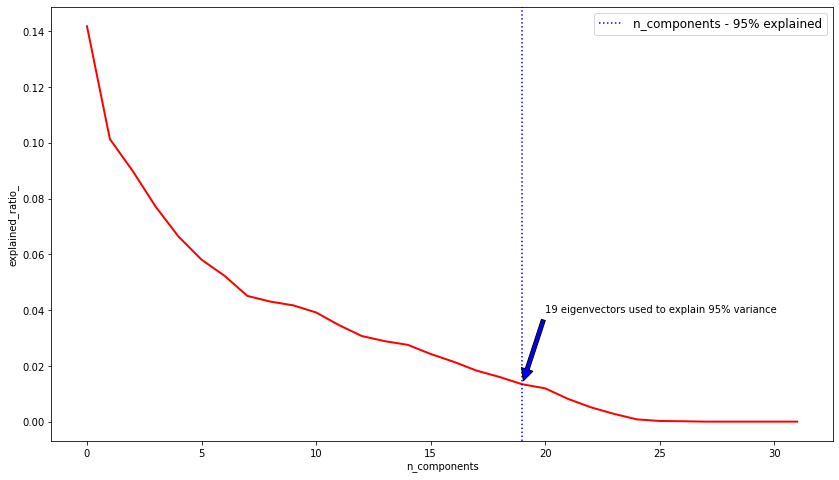

In [174]:
n_components = X.shape[1]

# running PCA with all components
pca = PCA(n_components = n_components, random_state = 45)
X_r = pca.fit(X).transform(X)

# calculating the 95% variance
total_variance = sum(pca.explained_variance_)
print('Total variance in our dataset is: ', total_variance)
var_95 = total_variance * 0.95
print('The 95% variance we want to have is: ', var_95)
print("")

# creating a df with the components and explained variance
a = zip(range(0, n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns = ['PCA_Comp', 'Explained_Variance'])

# Trying to hit 95% 
print('Variance explain with 10 n_components', sum(a['Explained_Variance'][0:10]))
print('Variance explain with 15 n_components', sum(a['Explained_Variance'][0:15]))
print('Variance explain with 19 n_components', sum(a['Explained_Variance'][0:19]))

# Plotting the data
plt.figure(1, figsize = (14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# plotting vertical line for 95% variance
plt.axvline(19, linestyle = ":", label = 'n_components - 95% explained', c = 'blue')
plt.legend(prop = dict(size = 12))

# adding arrow 
plt.annotate('19 eigenvectors used to explain 95% variance', xy =(19, pca.explained_variance_ratio_[19]),
            xytext =(20, pca.explained_variance_ratio_[10]),
            arrowprops = dict(facecolor = 'blue',shrink = 0.05));

The inertia for : 2 Clusters is: 699.018512700423
The inertia for : 3 Clusters is: 360.2431119974267
The inertia for : 4 Clusters is: 216.94512237302484
The inertia for : 5 Clusters is: 171.35543819635478
The inertia for : 6 Clusters is: 127.79527091798299
The inertia for : 7 Clusters is: 110.94218967876574
The inertia for : 8 Clusters is: 94.37047126425048
The inertia for : 9 Clusters is: 81.36790483608017
The inertia for : 10 Clusters is: 71.40538287794766
The inertia for : 11 Clusters is: 62.127935174590014
The inertia for : 12 Clusters is: 52.415789428311356
The inertia for : 13 Clusters is: 47.34625659414314
The inertia for : 14 Clusters is: 42.55937097515702
The inertia for : 15 Clusters is: 38.30539930500899
The inertia for : 16 Clusters is: 33.55170702840546
The inertia for : 17 Clusters is: 30.211619035518908
The inertia for : 18 Clusters is: 26.525734371537755


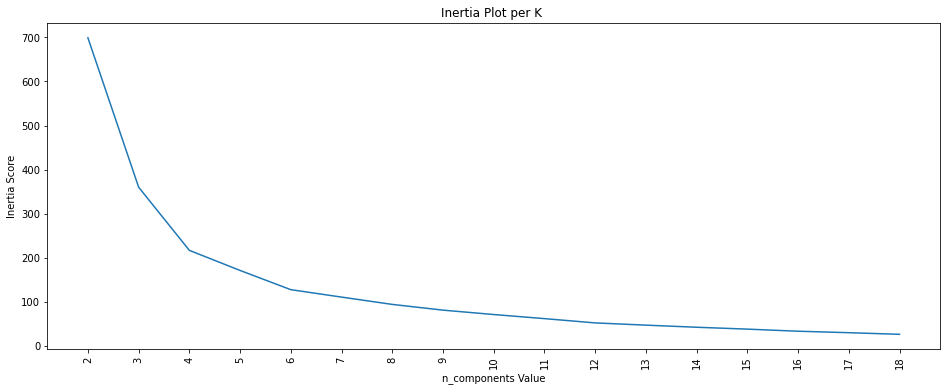

In [175]:
# We want rerun PCA again with 19 principal components to see if we can better scores. 


pca = PCA(n_components=2, random_state = 1)
X_r = pca.fit(X).transform(X)

inert = []

# running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters = f, random_state = 2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inert.append(u)
    print("The inertia for :", f, "Clusters is:", u)
    
# creating the scree plot for intertia - elbow method 
fig, (ax1) = plt.subplots(1, figsize = (16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inert)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation = 'vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title('Inertia Plot per K ');



+ We have managed to drastically improve our results by reducing intertia. Below are results before PCA

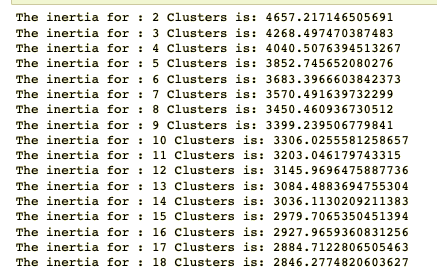

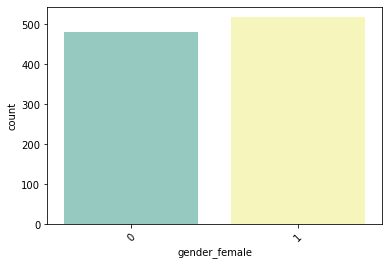

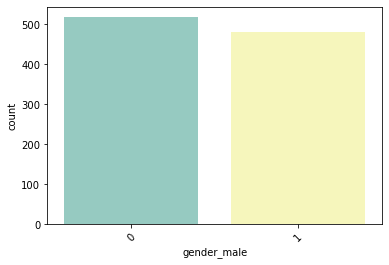

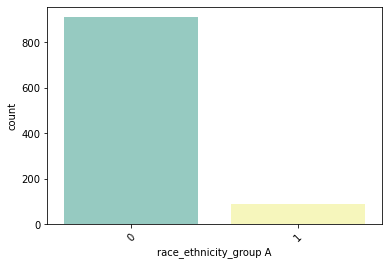

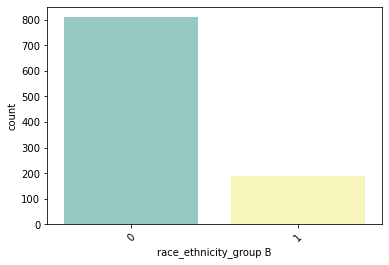

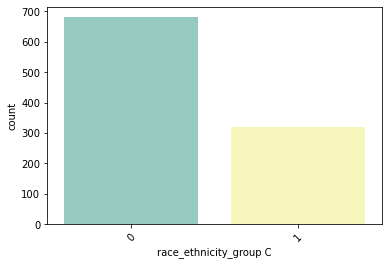

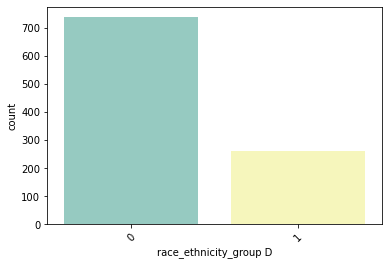

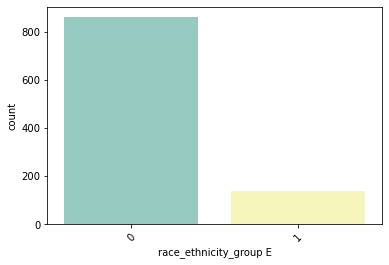

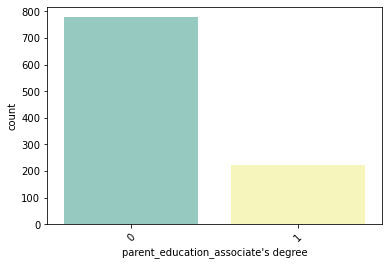

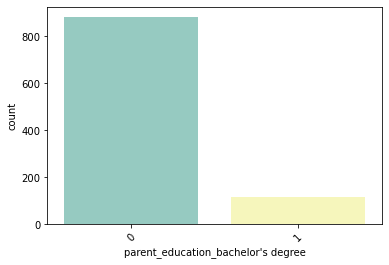

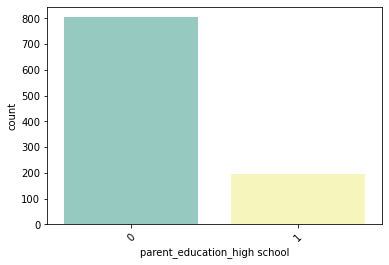

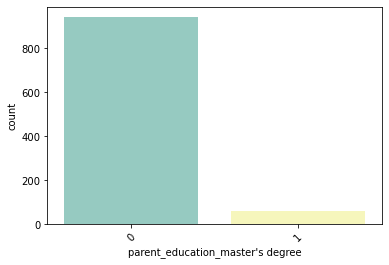

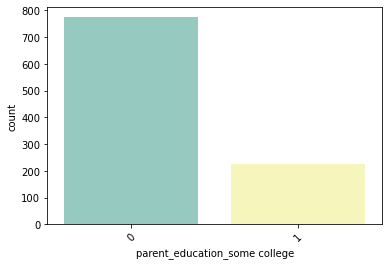

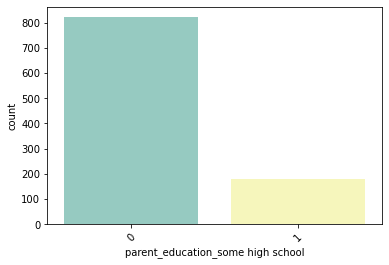

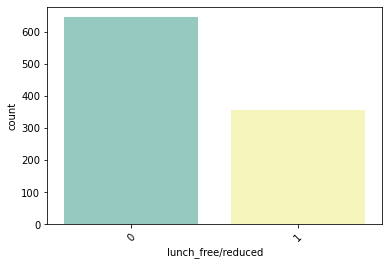

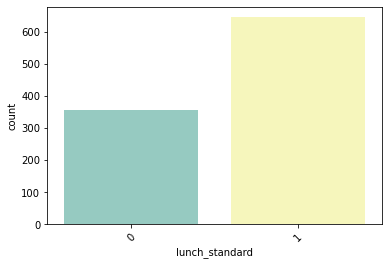

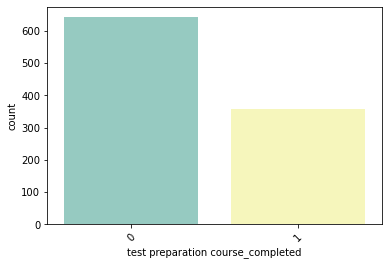

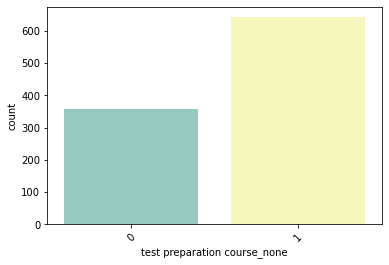

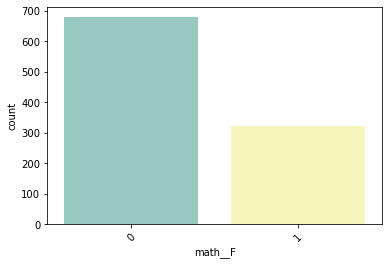

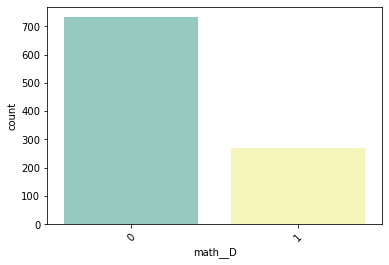

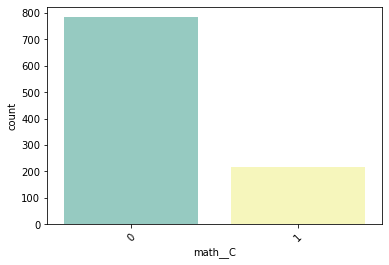

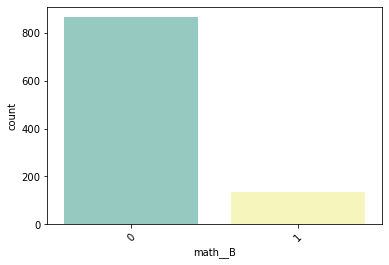

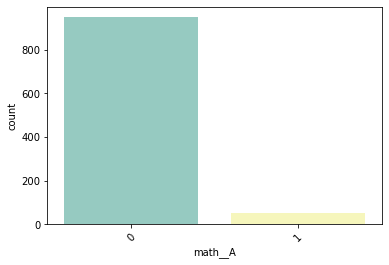

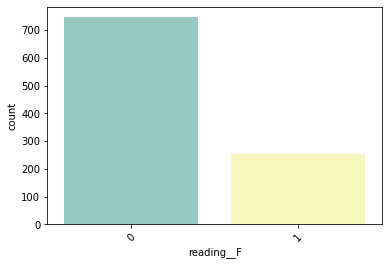

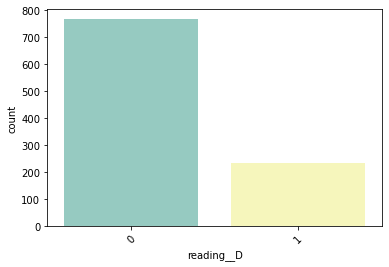

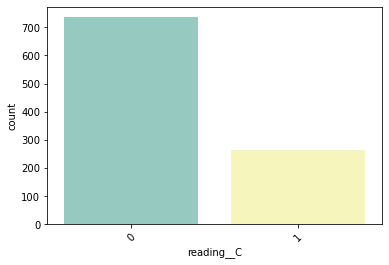

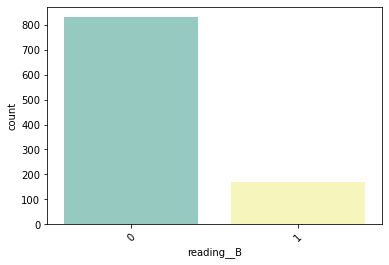

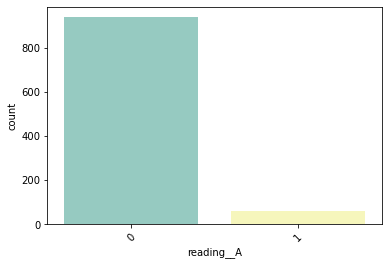

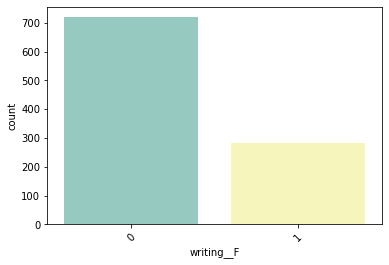

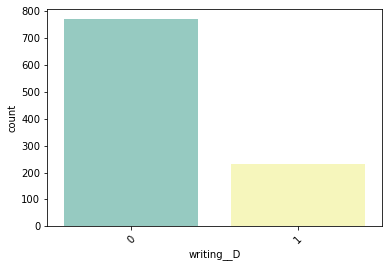

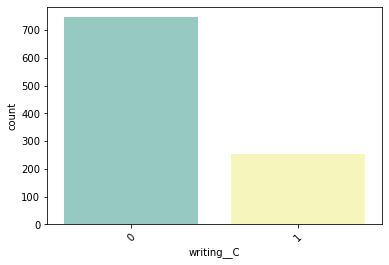

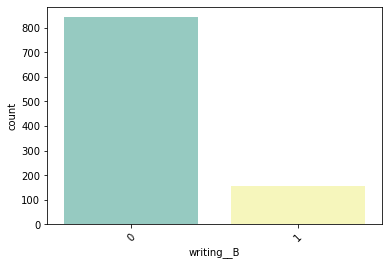

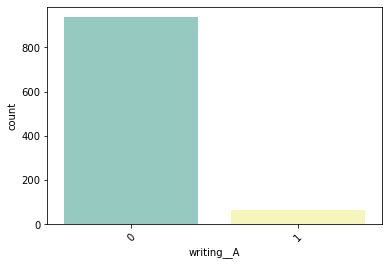

In [155]:
# Visualize distribution of columns. For a higher dimensional problem this presents a solution to downsize and 
# combine columns 

features = new_df.columns

for f in features:
    sns.countplot(x = f, data = new_df, palette = 'Set3')
    plt.xticks(rotation = 45)
    plt.show()

# K Nearest Neighbor with Breast Cancer Data Set

In [224]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [225]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

In [226]:
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

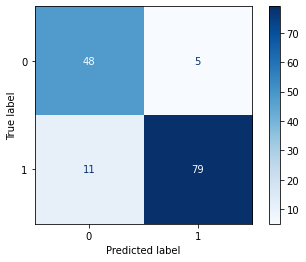

In [227]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues)
plt.show()

In [228]:
print(clf.score(X_test, y_test))

0.8881118881118881
